In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install matplotlib



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.6 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.0 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.1 MB/s eta 0:00:01
   ---------------

e:\code\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3398 - loss: 1.7840 - val_accuracy: 0.5572 - val_loss: 1.2243
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5787 - loss: 1.1873 - val_accuracy: 0.6109 - val_loss: 1.1113
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6428 - loss: 1.0133 - val_accuracy: 0.6494 - val_loss: 0.9849
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6849 - loss: 0.8980 - val_accuracy: 0.6659 - val_loss: 0.9438
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7116 - loss: 0.8135 - val_accuracy: 0.6921 - val_loss: 0.8808
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7346 - loss: 0.7601 - val_accuracy: 0.6927 - val_loss: 0.8889
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7549 - loss: 0.7002 - val_accuracy: 0.6993 - val_loss: 0.8987
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7682 - loss: 0

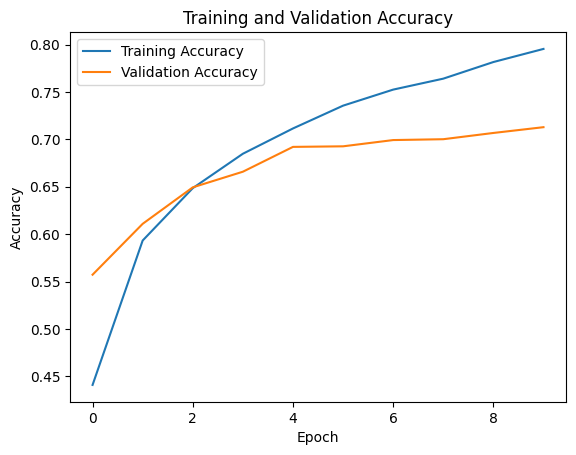

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3365 - loss: 1.8000 - val_accuracy: 0.5092 - val_loss: 1.3517
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5374 - loss: 1.2788 - val_accuracy: 0.5915 - val_loss: 1.1594
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6111 - loss: 1.1013 - val_accuracy: 0.6134 - val_loss: 1.0947
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6524 - loss: 0.9993 - val_accuracy: 0.6298 - val_loss: 1.0606
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6866 - loss: 0.9057 - val_accuracy: 0.6646 - val_loss: 0.9648
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6976 - loss: 0.8617 - val_accuracy: 0.6772 - val_loss: 0.9110
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7192 - loss: 0.8016 - val_accuracy: 0.6805 - val_loss: 0.9220
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7354 - loss: 0.7587 - va

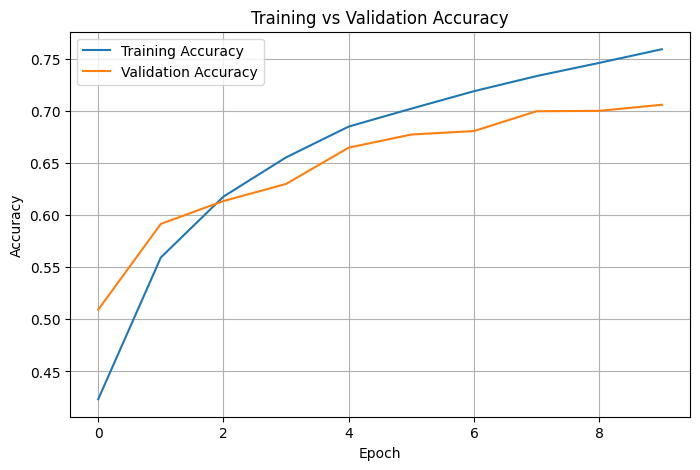

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


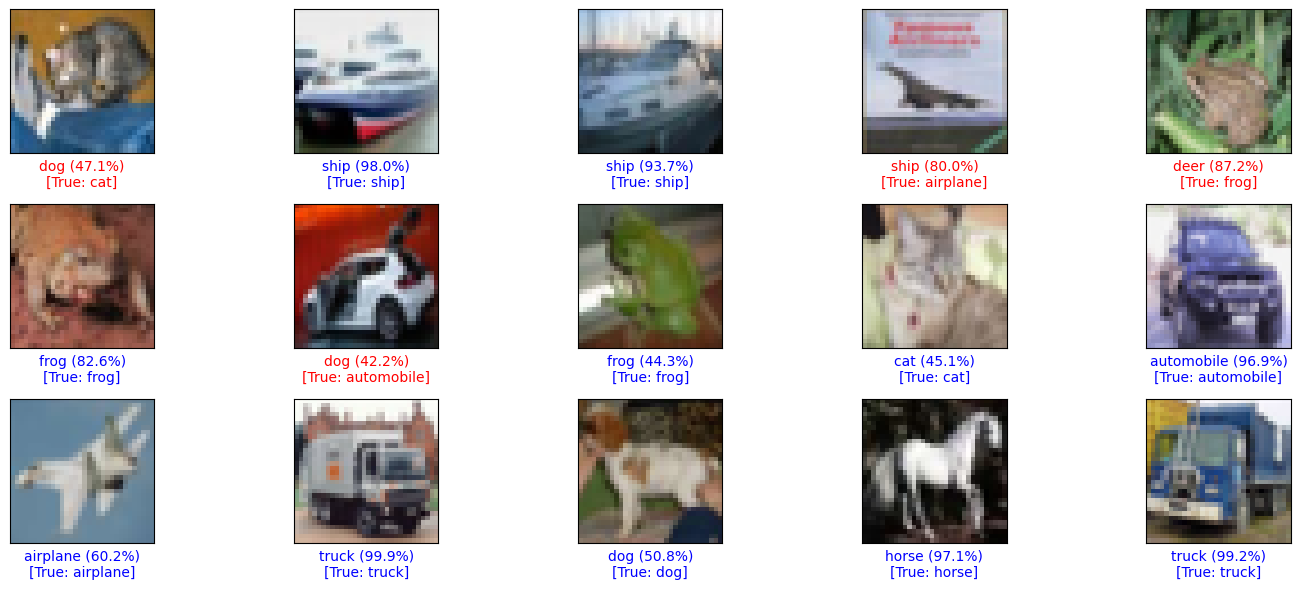

In [25]:
##DELIVERABLE: A FUNCTIONAL MODEL
##WITH VISUALIZATIONS OF RESULTS.
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n✅ Test accuracy: {test_acc:.2f}')

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

# Function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.1f}%)\n[True: {class_names[true_label]}]",
               color=color)

# Plot the first 15 test images with predictions
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()
